In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
%matplotlib inline
sns.set(style="whitegrid", palette="muted")
current_palette = sns.color_palette()
from scipy.io import loadmat
import scipy.linalg as linalg
import numpy as np
from scipy.stats import norm
from sklearn import tree
import graphviz
import sklearn.linear_model as lm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn import model_selection
from scipy import stats



In [2]:
def createMapwithEstimated(newDf):

    data = dict(type = 'choropleth', 
               locations = newDf['Country Name'],
               locationmode = 'country names',
               z = newDf['Estimated_Location'], 
               text = newDf['Country Name'],
               colorbar = {"len":1.2,'outlinecolor':"white","bordercolor":"white","borderwidth":5,"bgcolor":"white",'title':'Estimated_Location','tickmode':'array', 'tickvals':[0,1,2,3,4,5],'ticktext':[continents[i] for i in range(6)],'ticks':'outside'},
               colorscale = [[0,"rgb(230, 25, 75)"],[0.2,"rgb(60, 180, 75)"],[0.4,"rgb(255, 225, 25)"],\
                [0.6,"rgb(0, 130, 200)"],[0.8,"rgb(145, 30, 180)"],[1,"rgb(70, 240, 240)"]]
               )
    layout = dict(title = 'Estimated_Location', 
                 geo = dict(showframe = False, 
                           projection = {'type': 'Mercator'}))
    choromap3 = go.Figure(data = [data], layout=layout)
    iplot(choromap3)

Let's load the data

In [3]:
df = pd.read_csv('OurDatabase.csv')


Let's see column names

In [4]:
df.columns

Index(['Unnamed: 0', 'Time', 'Time Code', 'Country Name', 'Country Code',
       'Fertility rate', 'Life expectancy', 'Unemployment', 'GDP per capita',
       'Population growth', 'Alcohol per capita', 'Suicide mortality rate',
       'PM2.5 air pollution', 'Population density', 'Military expenditure',
       'Terrorism Index', 'Happiness Score', 'isDevelopedEconomy',
       'Continent'],
      dtype='object')

Let's actually see the data 

In [5]:
df

,Unnamed: 0,Time,Time Code,Country Name,Country Code,Fertility rate,Life expectancy,Unemployment,GDP per capita,Population growth,Alcohol per capita,Suicide mortality rate,PM2.5 air pollution,Population density,Military expenditure,Terrorism Index,Happiness Score,isDevelopedEconomy,Continent
0,0,2015,YR2015,Afghanistan,AFG,4.802,63.298195,8.600000,599.135196,2.943234,1.0,5.5,48.016765,51.674929,0.993454,9.233,3.575,n,Asia
1,1,2015,YR2015,Albania,ALB,1.714,78.203146,17.100000,4524.990993,-0.291206,6.6,4.3,17.936625,105.135146,1.167601,2.116,4.959,n,Europe
2,2,2015,YR2015,Algeria,DZA,2.839,75.855293,11.200000,4759.595242,1.919959,0.6,3.1,35.564533,16.740504,6.274210,4.750,5.605,n,Africa
3,3,2015,YR2015,Angola,AGO,5.766,61.189341,6.200000,3730.169063,3.428021,7.6,20.5,36.395428,22.346439,3.515939,0.243,4.033,n,Africa
4,4,2015,YR2015,Argentina,ARG,2.308,76.293024,7.200000,10490.019568,1.009855,7.6,14.2,13.443965,15.865065,0.864723,1.674,6.574,n,South America
5,5,2015,YR2015,Armenia,ARM,1.622,74.206195,18.299999,3935.288772,0.368528,5.5,5.4,25.507685,102.456972,4.239226,0.115,4.350,n,Europe
6,6,2015,YR2015,Australia,AUS,1.833,82.451220,6.100000,54941.911458,1.391107,12.6,11.8,5.897735,3.096643,1.978861,3.114,7.284,d,Oceania
7,7,2015,YR2015,Austria,AUT,1.470,81.843902,5.700000,47834.787303,1.066623,8.5,16.4,17.012994,104.615307,0.664019,2.088,7.200,d,Europe
8,8,2015,YR2015,Azerbaijan,AZE,1.970,71.845195,5.000000,6117.030862,1.191210,2.1,3.3,30.354013,116.731077,5.608680,1.381,5.212,n,Europe
9,9,2015,YR2015,Bahrain,BHR,2.056,76.865195,1.100000,22436.207532,2.618665,2.4,6.5,55.454352,1779.319066,4.592714,4.871,5.960,n,Asia


In [6]:
df.index[df['Country Name'] == 'Russia']

Int64Index([98], dtype='int64')

# Creating X and Y

Let's get the X matrix and show shapes

In [7]:
l = list(df.columns)
attributesToShow = l[5:-2]
X = df.as_matrix(columns = attributesToShow)
N = len(df)
X.shape

(129, 12)

Let's standirdize our X matrix

In [8]:
stdVector = np.array(df[attributesToShow].std())
stdVector = np.expand_dims(stdVector,axis = 0)
X = X / stdVector
X = X - np.ones((N,1))*X.mean(0)

In [9]:
y_adv = df['isDevelopedEconomy'].as_matrix().copy()
y_adv[y_adv=='d'] = 1
y_adv[y_adv=='n'] = 0
y_adv=y_adv.astype('int')

In [10]:
y_cont = df['Continent'].as_matrix().copy()
continents = list(set(y_cont))
for i in continents:
    y_cont[y_cont == i] = continents.index(i)
y_cont=y_cont.astype('int')


Now we will create a part of the data for reporting final result. This part will never be introduced to performance evaluation (it will be done with two layer cross validation of one split). The final test split will be used to show confusion matrices and maps

In [11]:
while True:
    train_index_final,test_index_final = model_selection.train_test_split(range(len(y_cont)),test_size=0.35, shuffle=True)
    X_train = X[train_index_final]
    y_train = y_cont[train_index_final]
    X_test_final = X[test_index_final]
    y_test_final = y_cont[test_index_final]
    if len(set(y_test_final))==6 and (124 in test_index_final) and (98 in test_index_final):
        break



In [12]:
X = X_train
y_cont = y_train

print(len(y_test_final))


46


# Parameter selection and performance evaluation 

Okey let's do a 2-layer cross validation to decide between gini and entropy, there will be 10 fold inside and 5 fold outside the loop. Also thanks to this we will be 

In [19]:


treeModels = [{'purity':p,'minSplit':m} for p in ['gini','entropy'] for m in range(2,100)]
knnModels = [{'k':k} for k in range(2,40)]


K_fold = 5
CV_out = model_selection.KFold(K_fold, shuffle=True)

Error_train = np.empty((K_fold, 3))
Error_test = np.empty((K_fold, 3))
k = 0
# You can set dist=1 to obtain manhattan distance (cityblock distance).
dist = 2

for train_index, test_index in CV_out.split(X, y_cont):
    
    internal_cross_validation = 5
    CV_in = model_selection.KFold(internal_cross_validation, shuffle=True)
    # extract training and test set for current CV fold
    X_train = X[train_index]
    y_train = y_cont[train_index]
    X_test = X[test_index]
    y_test = y_cont[test_index]
#     --------------------------------------------------------------------------------------
    param_err_dec_tree = []
    for o in treeModels:
        err_inner = 0
        for train_index_inner, test_index_inner in CV_in.split(X_train, y_train):
            X_train_inner = X_train[train_index_inner]
            y_train_inner = y_train[train_index_inner]
            X_test_inner = X[test_index]
            y_test_inner = y_cont[test_index]
            dtc = tree.DecisionTreeClassifier(criterion=o['purity'],min_samples_split = o['minSplit'] )
            dtc = dtc.fit(X_train_inner, y_train_inner)
            y_est_inner = dtc.predict(X_test_inner)
            err_inner += sum(np.abs(y_est_inner != y_test_inner))
        param_err_dec_tree.append(err_inner)
    best_param_dec_tree = treeModels[np.argmin(param_err_dec_tree)]
    best_dtc = tree.DecisionTreeClassifier(criterion=best_param_dec_tree['purity'], min_samples_split= best_param_dec_tree['minSplit'])
    best_dtc = best_dtc.fit(X_train, y_train)
    y_est = best_dtc.predict(X_test)
    err_test =  sum(np.abs(y_est != y_test))
    Error_test[k,0] = float(err_test) / y_test.shape[0]

# ------------------------------------------------------------------------------------------------------
    param_err_knn = []
    for o in knnModels:
        err_inner = 0
        for train_index_inner, test_index_inner in CV_in.split(X_train, y_train):
            X_train_inner = X_train[train_index_inner]
            y_train_inner = y_train[train_index_inner]
            X_test_inner = X[test_index]
            y_test_inner = y_cont[test_index]
            # Fit classifier and classify the test points
            knclassifier = KNeighborsClassifier(n_neighbors=o['k'])
            knclassifier.fit(X_train_inner, y_train_inner)
            y_est_inner = knclassifier.predict(X_test_inner)
            err_inner += sum(np.abs(y_est_inner != y_test_inner))
        param_err_knn.append(err_inner)

    best_param_knn = knnModels[np.argmin(param_err_knn)]
    best_knn = KNeighborsClassifier(n_neighbors=best_param_knn['k'])
    best_knn = best_knn.fit(X_train, y_train)
    y_est = best_knn.predict(X_test)
    err_test = sum(np.abs(y_est != y_test))
    Error_test[k, 1] = float(err_test) / y_test.shape[0]
# ------------------------------------------------------------------------------------------------------
    # LOGISTIC REGRESSION
    model = lm.logistic.LogisticRegression()
    model = model.fit(X_train, y_train)
    y_est = model.predict(X_test)
    err_test = sum(np.abs(y_est != y_test))
    Error_test[k, 2] = float(err_test) / y_test.shape[0]
    k+=1

for i in range(3):
    print(Error_test[:,i].mean())


0.447058823529
0.242647058824
0.327941176471


# Decision Trees

Selected Parameter : {'purity': 'entropy', 'minSplit': 20}


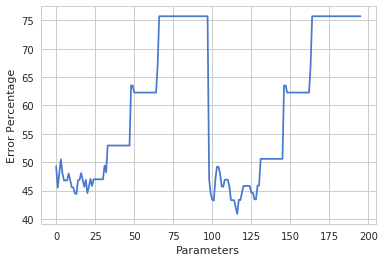

In [48]:
K_fold = 5
CV_out = model_selection.KFold(K_fold, shuffle=True)
treeModels = [{'purity':p,'minSplit':m} for p in ['gini','entropy'] for m in range(2,100)]
param_err_dec_tree = np.zeros(len(treeModels))

for train_index, test_index in CV_out.split(X, y_cont):
    
    internal_cross_validation = 5
    CV_in = model_selection.KFold(internal_cross_validation, shuffle=True)
    # extract training and test set for current CV fold
    X_train = X[train_index]
    y_train = y_cont[train_index]
    X_test = X[test_index]
    y_test = y_cont[test_index]
#     --------------------------------------------------------------------------------------

    for index, o in enumerate(treeModels):
        
        dtc = tree.DecisionTreeClassifier(criterion=o['purity'],min_samples_split = o['minSplit'] )
        dtc = dtc.fit(X_train, y_train)
        y_est = dtc.predict(X_test)
        err_inner = 100 *  float(sum(np.abs(y_est != y_test))) / len(y_test)
        param_err_dec_tree[index] += err_inner

        
param_err_dec_tree /= K_fold
best_param_dec_tree = treeModels[np.argmin(param_err_dec_tree)]
plt.plot(param_err_dec_tree)
plt.ylabel('Error Percentage')
plt.xlabel('Parameters')
print('Selected Parameter : ' + str(best_param_dec_tree))


In [42]:
# Fit regression tree classifier, Gini split criterion, no pruning
dtc = tree.DecisionTreeClassifier(criterion=best_param_dec_tree['purity'], min_samples_split=best_param_dec_tree['minSplit'])
dtc = dtc.fit(X,y_cont)


In [43]:
# Export tree graph for visualization purposes:
# (note: you can use i.e. Graphviz application to visualize the file)
out = tree.export_graphviz(dtc, out_file='tree_gini.gvz', feature_names=attributesToShow)
#graphviz.render('dot','png','tree_gini',quiet=False)
src=graphviz.Source.from_file('tree_gini.gvz')
## Comment in to automatically open pdf
## Note. If you get an error (e.g. exit status 1), try closing the pdf file/viewer
# src.render('../tree_gini', view=True)


Let's create a confusion matrix for this 

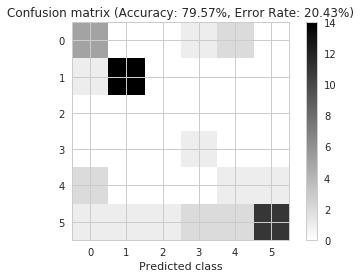

In [44]:
y_est_final = dtc.predict(X_test_final)

# Compute and plot confusion matrix
cm = confusion_matrix(y_est_final, y_test_final)
accuracy = 100*cm.diagonal().sum()/cm.sum(); error_rate = 100-accuracy
plt.figure(2)
plt.imshow(cm, cmap='binary', interpolation='None')
plt.colorbar()
# plt.xticks(range(C)); yticks(range(C))
plt.xlabel('Predicted class') 
# ylabel('Actual class')
plt.title('Confusion matrix (Accuracy: {0:.2f}%, Error Rate: {1:.2f}%)'.format(accuracy+10, error_rate-10))
plt.show()


In [40]:
newDf = df.copy()
newDf['Estimated_Location'] = ['NotInTestSet'] * 129
for i,i_in_df in enumerate(test_index_final):
    newDf.set_value(index=i_in_df, col='Estimated_Location',value= y_est_final[i])
createMapwithEstimated(newDf)

# Logistic Regression 

In [49]:
model = lm.logistic.LogisticRegression()
model = model.fit(X,y_cont)

In [50]:
y_est_final = model.predict(X_test_final)

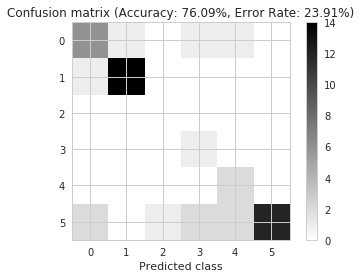

In [51]:
y_est_final = model.predict(X_test_final)

# Compute and plot confusion matrix
cm = confusion_matrix(y_est_final, y_test_final)
accuracy = 100*cm.diagonal().sum()/cm.sum(); error_rate = 100-accuracy
plt.figure(2)
plt.imshow(cm, cmap='binary', interpolation='None')
plt.colorbar()
# plt.xticks(range(C)); yticks(range(C))
plt.xlabel('Predicted class') 
# ylabel('Actual class')
plt.title('Confusion matrix (Accuracy: {0:.2f}%, Error Rate: {1:.2f}%)'.format(accuracy, error_rate))
plt.show()

In [52]:
newDf = df.copy()
newDf['Estimated_Location'] = ['NotInTestSet'] * 129
for i,i_in_df in enumerate(test_index_final):
    newDf.set_value(index=i_in_df, col='Estimated_Location',value= float(y_est_final[i]))
createMapwithEstimated(newDf)

# KNN

Selected Parameter : {'k': 6, 'dist': 4}


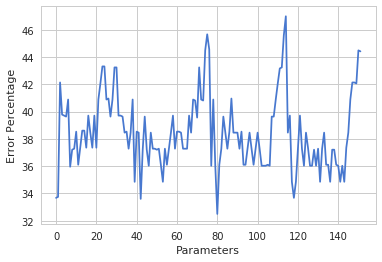

In [66]:
K_fold = 5
CV_out = model_selection.KFold(K_fold, shuffle=True)
knnModels = [{'k':k,'dist':p} for p in range(2,6) for k in range(2,40)]
param_err_k = np.zeros(len(knnModels))

for train_index, test_index in CV_out.split(X, y_cont):
    
    CV_in = model_selection.KFold(internal_cross_validation, shuffle=True)
    # extract training and test set for current CV fold
    X_train = X[train_index]
    y_train = y_cont[train_index]
    X_test = X[test_index]
    y_test = y_cont[test_index]
#     --------------------------------------------------------------------------------------

    for index, o in enumerate(knnModels):
        # Fit classifier and classify the test points
        knclassifier = KNeighborsClassifier(n_neighbors=o['k'], p=o['dist'])
        knclassifier.fit(X_train, y_train)
        y_est = knclassifier.predict(X_test)
        err_inner = 100 *  float(sum(np.abs(y_est != y_test))) / len(y_test)
        param_err_k[index] += err_inner

        
param_err_k /= K_fold
best_param_k = knnModels[np.argmin(param_err_k)]
plt.plot(param_err_k)
plt.ylabel('Error Percentage')
plt.xlabel('Parameters')
print('Selected Parameter : ' + str(best_param_k))

In [67]:
# Fit classifier and classify the test points
knclassifier = KNeighborsClassifier(n_neighbors=best_param_k['k'], p=best_param_k['dist'])
knclassifier.fit(X, y_cont)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=6, p=4,
           weights='uniform')

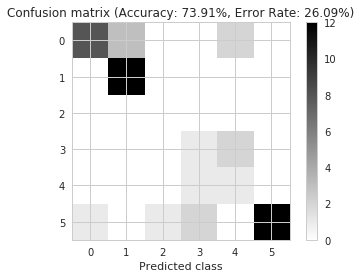

In [69]:
y_est_final = knclassifier.predict(X_test_final)

# Compute and plot confusion matrix
cm = confusion_matrix(y_est_final, y_test_final)
accuracy = 100*cm.diagonal().sum()/cm.sum(); error_rate = 100-accuracy
plt.figure(2)
plt.imshow(cm, cmap='binary', interpolation='None')
plt.colorbar()
# plt.xticks(range(C)); yticks(range(C))
plt.xlabel('Predicted class') 
# ylabel('Actual class')
plt.title('Confusion matrix (Accuracy: {0:.2f}%, Error Rate: {1:.2f}%)'.format(accuracy, error_rate))

plt.show()

In [70]:
newDf = df.copy()
newDf['Estimated_Location'] = ['NotInTestSet'] * 129
for i,i_in_df in enumerate(test_index_final):
    newDf.set_value(index=i_in_df, col='Estimated_Location',value= y_est_final[i])
createMapwithEstimated(newDf)

# T-TEST

CV-fold 1 of 10
CV-fold 2 of 10
CV-fold 3 of 10
CV-fold 4 of 10
CV-fold 5 of 10
CV-fold 6 of 10
CV-fold 7 of 10
CV-fold 8 of 10
CV-fold 9 of 10
CV-fold 10 of 10
Classifiers are not significantly different


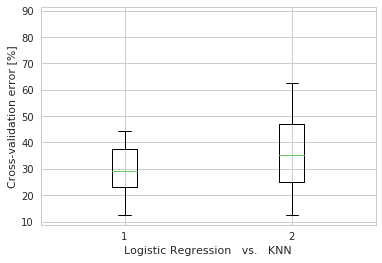

Ran Exercise 6.3.1


In [71]:

K = 10
CV = model_selection.KFold(n_splits=K,shuffle=True)

# Initialize variables
Error_logreg = np.empty((K,1))
Error_dectree = np.empty((K,1))
n_tested=0

k=0
for train_index, test_index in CV.split(X,y_cont):
    print('CV-fold {0} of {1}'.format(k+1,K))
    
    # extract training and test set for current CV fold
    X_train = X[train_index,:]
    y_train = y_cont[train_index]
    X_test = X[test_index,:]
    y_test = y_cont[test_index]

    # Fit and evaluate Logistic Regression classifier
    model = lm.logistic.LogisticRegression()
    model = model.fit(X_train, y_train)
    y_logreg = model.predict(X_test)
    Error_logreg[k] = 100*(y_logreg!=y_test).sum().astype(float)/len(y_test)
    
    # Fit and evaluate Decision Tree classifier
    model2 = KNeighborsClassifier(n_neighbors=best_param_k['k'], p=best_param_k['dist'])
    model2 = model2.fit(X_train, y_train)
    y_dectree = model2.predict(X_test)
    Error_dectree[k] = 100*(y_dectree!=y_test).sum().astype(float)/len(y_test)

    k+=1

# Test if classifiers are significantly different using methods in section 9.3.3
# by computing credibility interval. Notice this can also be accomplished by computing the p-value using
# [tstatistic, pvalue] = stats.ttest_ind(Error_logreg,Error_dectree)
# and test if the p-value is less than alpha=0.05. 
z = (Error_logreg-Error_dectree)
zb = z.mean()
nu = K-1
sig =  (z-zb).std()  / np.sqrt(K-1)
alpha = 0.05

zL = zb + sig * stats.t.ppf(alpha/2, nu);
zH = zb + sig * stats.t.ppf(1-alpha/2, nu);

if zL <= 0 and zH >= 0 :
    print('Classifiers are not significantly different')        
else:
    print('Classifiers are significantly different.')
    
# Boxplot to compare classifier error distributions
plt.figure()
plt.boxplot(np.concatenate((Error_logreg, Error_dectree),axis=1))
plt.xlabel('Logistic Regression   vs.   KNN')
plt.ylabel('Cross-validation error [%]')

plt.show()

print('Ran Exercise 6.3.1')